# Wrangling data on subnational population

Population data provided by [World Bank](https://databank.worldbank.org/reports.aspx?source=subnational-population#). Includes Ethiopia, Sudan, South Sudan, and Tanzania for the period 2009-2016. Kenya is also included, but most regional stats do not align with the boundaries of our target regions. A separate dataset for Kenya will be used below, provided by [OCHA](https://data.humdata.org/dataset/kenya-population-totals-per-county). Years outside of the range of available date will be coded with the nearest known value. For Kenyan, region, 2015 data is used for all years.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1 Load  Data
Data downloaded as csv to local disc from above link.

In [3]:
pop = pd.read_csv('e5267ea5-0dea-4e0f-84b7-e0007b0a1c00_Data.csv')

print(pop.shape)
pop.sample(10)

(84, 13)


,Series Name,Series Code,Level_attr,Country Name,Country Code,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
26,"Population, total",SP.POP.TOTL,Tanzania,"Tanzania, Njombe",TZA_Njombe_TZ.NJ_115007_TZA031,741000.0,751000.0,760000.0,769000.0,778000.0,788000.0,797000.0,806000.0
22,"Population, total",SP.POP.TOTL,Tanzania,"Tanzania, Mjini Magharibi",TZA_Mjini_Magharibi_TZ.ZW_48382_TZA025,563000.0,590000.0,618000.0,647000.0,678000.0,709000.0,742000.0,777000.0
52,"Population, total",SP.POP.TOTL,South Sudan,"South Sudan, El Buheyrat",SSD_El_Buheyrat_SS.EB_2746_SSD003,815000.0,848000.0,880000.0,911000.0,941000.0,971000.0,1001000.0,1030000.0
28,"Population, total",SP.POP.TOTL,Tanzania,"Tanzania, Rukwa",TZA_Rukwa_TZ.RK_115008_TZA017,983000.0,1020000.0,1058000.0,1097000.0,1137000.0,1178000.0,1221000.0,1265000.0
18,"Population, total",SP.POP.TOTL,Tanzania,"Tanzania, Lindi",TZA_Lindi_TZ.LI_48364_TZA008,909000.0,922000.0,934000.0,947000.0,960000.0,972000.0,985000.0,998000.0
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,"Population, total",SP.POP.TOTL,Sudan,"Sudan, Red Sea",SDN_Red_Sea_SD.RS_40772_SDN013,1380000.0,1375000.0,1375000.0,1382000.0,1393000.0,1419000.0,1434000.0,1449000.0
2,"Population, total",SP.POP.TOTL,NaN,Sudan,SDN,33651000.0,34386000.0,35167000.0,35990000.0,36850000.0,37738000.0,38648000.0,39579000.0
30,"Population, total",SP.POP.TOTL,Tanzania,"Tanzania, Shinyanga",TZA_Shinyanga_TZ.SH_115009_TZA019,1557000.0,1597000.0,1637000.0,1678000.0,1720000.0,1762000.0,1805000.0,1849000.0
63,"Population, total",SP.POP.TOTL,Kenya,"Kenya, Nairobi",KEN_Nairobi_Province_KE.NP_51328_KEN004,3267000.0,3381000.0,3499000.0,3618000.0,3739000.0,3863000.0,3987000.0,4113000.0


## 2 Reshape Data
- Drop rows for national level data.
- Extract admin1 name from the 'Country Name' column.
- Rename columns for future ease of use.
- __Use 2016 population statistics to fill for 2017-2019.__
- Melt data down to county-admin1-year level and losing excess data.

In [4]:
pop = pop[~pop['Level_attr'].isna()]

pop.head(2)

,Series Name,Series Code,Level_attr,Country Name,Country Code,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
5,"Population, total",SP.POP.TOTL,Tanzania,"Tanzania, Arusha",TZA_Arusha_City_115082,1682000.0,1737000.0,1793000.0,1851000.0,1910000.0,1970000.0,2032000.0,2095000.0
6,"Population, total",SP.POP.TOTL,Tanzania,"Tanzania, Dar-es-salaam",TZA_Dar-es-salaam_TZ.DS_48358_TZA002,3957000.0,4206000.0,4469000.0,4747000.0,5041000.0,5353000.0,5682000.0,6031000.0


In [5]:
pop['admin1'] = pop['Country Name'].map(lambda x: x.split(', ')[1])

pop.head(2)

,Series Name,Series Code,Level_attr,Country Name,Country Code,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],admin1
5,"Population, total",SP.POP.TOTL,Tanzania,"Tanzania, Arusha",TZA_Arusha_City_115082,1682000.0,1737000.0,1793000.0,1851000.0,1910000.0,1970000.0,2032000.0,2095000.0,Arusha
6,"Population, total",SP.POP.TOTL,Tanzania,"Tanzania, Dar-es-salaam",TZA_Dar-es-salaam_TZ.DS_48358_TZA002,3957000.0,4206000.0,4469000.0,4747000.0,5041000.0,5353000.0,5682000.0,6031000.0,Dar-es-salaam


In [6]:
naming = {
    '2009 [YR2009]': '2009',
    '2010 [YR2010]': '2010',
    '2011 [YR2011]': '2011',
    '2012 [YR2012]': '2012',
    '2013 [YR2013]': '2013',
    '2014 [YR2014]': '2014',
    '2015 [YR2015]': '2015',
    '2016 [YR2016]': '2016',
    'Level_attr': 'country'
}

pop.rename(columns=naming, inplace=True)

pop.sample(2)

,Series Name,Series Code,country,Country Name,Country Code,2009,2010,2011,2012,2013,2014,2015,2016,admin1
44,"Population, total",SP.POP.TOTL,Sudan,"Sudan, Red Sea",SDN_Red_Sea_SD.RS_40772_SDN013,1380000.0,1375000.0,1375000.0,1382000.0,1393000.0,1419000.0,1434000.0,1449000.0,Red Sea
34,"Population, total",SP.POP.TOTL,Tanzania,"Tanzania, Tanga",TZA_Tanga_District_48506,2063000.0,2120000.0,2177000.0,2236000.0,2295000.0,2356000.0,2418000.0,2480000.0,Tanga


In [7]:
for i in range(1,4):
    pop[str(2016+i)] = pop['2016']

In [8]:
pop_long = pop.melt(id_vars = ['country', 'admin1'],
                   value_vars = ['2009', '2010', '2011', '2012', 
                                 '2013', '2014', '2015', '2016',
                                 '2017', '2018', '2019'],
                   var_name = 'year',
                   value_name = 'pop')

pop_long.sample(3)

,country,admin1,year,pop
680,Tanzania,Manyara,2018,1792000.0
178,Sudan,Al Jazeera,2011,4129000.0
232,Tanzania,Kilimanjaro,2012,1794000.0


In [9]:
pop_long.shape

(814, 4)

## 3 Merge with our baseline data set
- Load the geojson of region-month level hunger score data into a table.
- __Remove duplicates in the region_scores data__
- Link admin1 names  
    - difference the two sets
    - use levenshtein distance to build a map for converting admin1 names from population data
    - convert
- Merge the two data — outer join preserving all hunger scores and broad casting population stats to all months of that year.

### 3.1 Load

In [10]:
scores = gpd.read_file('region_scores.geojson')

print(scores.shape)
scores.sample(10)

(4312, 6)


,ADMIN0,ADMIN1,month,year,CS,geometry
2880,Kenya,Samburu,12.0,2018.0,1.500000,"POLYGON ((36.75991 2.51235, 36.76614 2.49117, ..."
1377,South Sudan,Western Bahr el Ghazal,10.0,2011.0,1.500000,"POLYGON ((25.81703 10.43416, 25.81988 10.43083..."
3558,Somalia,Gedo,7.0,2009.0,3.000000,"POLYGON ((42.89000 4.29000, 43.09052 3.94625, ..."
310,Ethiopia,Tigray,4.0,2011.0,2.000000,"POLYGON ((39.99758 14.45305, 39.98742 14.43717..."
1735,Kenya,Elgeyo-Marakwet,6.0,2018.0,1.000000,"POLYGON ((35.69886 1.27917, 35.69833 1.27657, ..."
3434,Somalia,Bari,7.0,2014.0,2.500000,"POLYGON ((50.79877 11.98356, 50.80576 11.97939..."
1173,South Sudan,Lakes,10.0,2014.0,1.666667,"POLYGON ((30.37129 7.08209, 30.53654 7.06721, ..."
1166,South Sudan,Lakes,1.0,2010.0,1.500000,"POLYGON ((30.37129 7.08209, 30.53654 7.06721, ..."
1251,South Sudan,Unity,7.0,2014.0,2.500000,"POLYGON ((30.78923 9.75142, 30.79288 9.74854, ..."
537,Sudan,East Darfur,7.0,2010.0,2.000000,"POLYGON ((25.50750 12.96663, 25.56105 12.95551..."


In [11]:
naming = {
    'ADMIN0': 'country',
    'ADMIN1': 'admin1'
}

scores.rename(columns=naming, inplace=True)

scores.head(1)

,country,admin1,month,year,CS,geometry
0,Ethiopia,Addis Ababa,10.0,2018.0,1.0,"POLYGON ((38.78052 9.09681, 38.79296 9.08120, ..."


In [12]:
scores.drop_duplicates(inplace=True)
scores.shape

(4312, 6)

### 3.2 Link admin1

In [13]:
# convert year column of population dataframe from string to int before join
pop_long['year'] = pd.to_numeric(pop_long['year'], downcast='integer')

In [14]:
import Levenshtein as lev

__Grab those regions in the population data that don't match with the hunger scores data.__

In [15]:
zones_m = scores['admin1'].unique()
zones_j = pop_long['admin1'].unique()
wrong_zones = set(zones_j) - set(zones_m)

In [16]:
lev.ratio('aa', 'ab')

0.5

__Find the almost same region names and store them into a hash table for conversion.__

In [17]:
def find_matches(correct_zones, wrong_zones):

    zone_matches = {}

    for z1 in zones_m:
        for z2 in wrong_zones:
            if lev.ratio(z1, z2) > 0.8:
                print(z1, '----', z2)
                zone_matches[z2] = z1
                
    return zone_matches

zone_matches = find_matches(zones_m, wrong_zones)

Harari ---- Hareri
Benshangul Gumuz ---- Beneshangul Gumu
Gedaref ---- Gadaref
North Darfur ---- Northern Darfur
North Kordofan ---- Northern Kordofan
Sinnar ---- Sennar
South Darfur ---- Southern Darfur
South Kordofan ---- Southern Kordofan
West Darfur ---- Western Darfur
Northern Bahr el Ghazal ---- Northern Bahr El Ghazal
Western Bahr el Ghazal ---- Western Bahr El Ghazal


In [18]:
# function for converting admin1
def link(zone, zone_matches):
    if zone in zone_matches:
        correct_zone = zone_matches[zone]
        return correct_zone
    else:
        return zone

In [19]:
pop_long['admin1'] = pop_long['admin1'].map(lambda x: link(x, zone_matches))

### 3.3 Merge data

In [20]:
pop_j = scores.merge(pop_long, 
            on = ['country', 'admin1', 'year'],
            how = 'left')

print(pop_j.shape)
pop_j.sample(3)

(4312, 7)


,country,admin1,month,year,CS,geometry,pop
1319,South Sudan,Warrap,7.0,2014.0,2.0,"POLYGON ((28.78620 9.10511, 28.69472 9.02796, ...",NaN
2062,Kenya,Kirinyaga,10.0,2013.0,1.5,"POLYGON ((37.42392 -0.44206, 37.42373 -0.44597...",NaN
393,Ethiopia,Benshangul Gumuz,10.0,2019.0,2.6,"POLYGON ((36.68964 10.32096, 36.69057 10.32043...",1089000.0


In [21]:
pop_j['year'] = pop_j['year'].map(lambda x: int(x))

In [22]:
pop2009 = pop_j[(pop_j.year==2009) & (pop_j.month==7)]

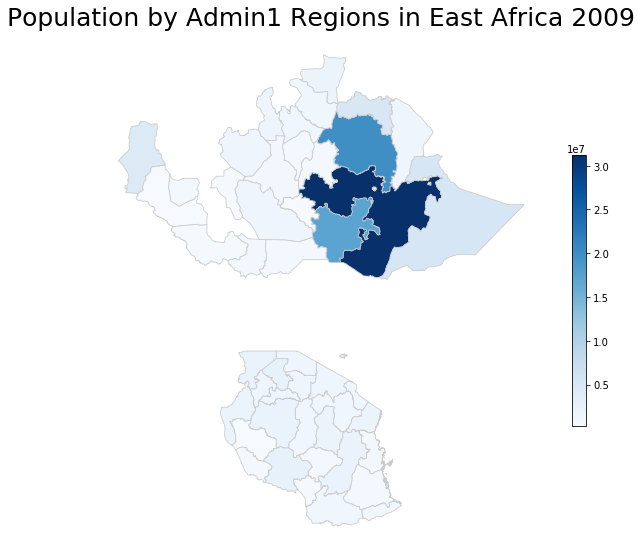

In [23]:
# Set plot size
fig, ax = plt.subplots(1, figsize=(10, 10))

# clear plot borders
ax.axis('off')

# customize plot title
ax.set_title("Population by Admin1 Regions in East Africa 2009", 
             fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot choropleth
pop2009.plot(column='pop', cmap='Blues', linewidth=0.8, edgecolor='0.8', ax=ax)

# Create colorbar as a legend, set the mni and max 
sm = plt.cm.ScalarMappable(cmap='Blues',
                          norm=plt.Normalize(
                              vmin=pop2009['pop'].min(), 
                              vmax=pop2009['pop'].max()))
# add the colorbar to the figure, and shrink it
cbar = fig.colorbar(sm, shrink=0.5)

## 4 Kenya data
### 4.1 load

In [56]:
kenya = pd.read_csv('kenya-population-per-county.csv')

print(kenya.shape)
kenya.sample(5)

(49, 3)


,Country,Counties,Population
44,Kenya,Uasin Gishu,"894,179"
40,Kenya,Tana River,"240,075"
26,Kenya,Meru,"1,356,301"
4,Kenya,Busia,"743,946"
7,Kenya,Garissa,"623,060"


### 4.15 Clean
Remove commas and convert population to numeric.

In [61]:
def remove_comma(num):
    if isinstance(num, float):
        return num
    else:
        return num.replace(',', '')

In [62]:
kenya[' Population'] = pd.to_numeric(kenya[' Population'].map(remove_comma))
kenya.sample(2)

,Country,Counties,Population
2,Kenya,Bomet,724186.0
35,Kenya,Nyandarua,596268.0


### 4.2 record matching

In [63]:
kenya_zones_n = set(kenya.Counties.unique())
kenya_zones_o = set(pop_j[pop_j.country=='Kenya'].admin1.unique())
kenya_zones_diff = kenya_zones_n - kenya_zones_o

kenya_zones_diff

{'Elgeiyo-Marakwet', 'National Average', 'Tharaka - Nithi', nan}

In [64]:
# remove nan's from the set
kenya_zones_diff = set(filter(lambda x: x==x, kenya_zones_diff))

# get matches
ken_matches = find_matches(kenya_zones_o, kenya_zones_diff)

Elgeyo-Marakwet ---- Elgeiyo-Marakwet
Tharaka Nithi ---- Tharaka - Nithi


In [65]:
kenya['Counties'] = kenya.Counties.map(lambda x: link(x, ken_matches))

### 4.3 merging

In [66]:
# name kenya data columns to match main df
naming = {
    'Country': 'country',
    'Counties': 'admin1',
    ' Population': 'pop'
}

kenya.rename(columns=naming, inplace=True)
kenya.head(1)

,country,admin1,pop
0,NaN,National Average,38653555.0


In [67]:
pop_final = pop_j.merge(kenya, 
                        on = ['country', 'admin1'],
                        how = 'left')

pop_final.sample(5)

,country,admin1,month,year,CS,geometry,pop_x,pop_y
1475,Uganda,Eastern,1.0,2014,1.5,"POLYGON ((33.73357 2.41622, 33.76437 2.39696, ...",NaN,NaN
2910,Kenya,Siaya,6.0,2016,1.0,"POLYGON ((34.26474 0.30593, 34.26657 0.30556, ...",NaN,885762.0
1223,South Sudan,Northern Bahr el Ghazal,4.0,2013,2.0,"POLYGON ((26.66542 9.49546, 26.66970 9.49499, ...",975000.0,NaN
3259,Kenya,West Pokot,10.0,2013,1.5,"POLYGON ((35.23233 2.44496, 35.23452 2.44454, ...",NaN,512690.0
393,Ethiopia,Benshangul Gumuz,10.0,2019,2.6,"POLYGON ((36.68964 10.32096, 36.69057 10.32043...",1089000.0,NaN


In [68]:
pop_final['pop'] = pop_final['pop_x'].fillna(pop_final['pop_y'])

pop_final.drop(columns=['pop_x', 'pop_y'], inplace=True)

pop_final.sample(5)

,country,admin1,month,year,CS,geometry,pop
3185,Kenya,Vihiga,4.0,2012,1.0,"POLYGON ((34.90278 0.19705, 34.90316 0.19655, ...",554622.0
1711,Kenya,Elgeyo-Marakwet,1.0,2010,2.0,"POLYGON ((35.69886 1.27917, 35.69833 1.27657, ...",369998.0
1251,South Sudan,Unity,7.0,2014,2.5,"POLYGON ((30.78923 9.75142, 30.79288 9.74854, ...",818000.0
110,Ethiopia,Amhara,1.0,2012,2.0,"POLYGON ((36.48092 13.72510, 36.48057 13.72457...",21587000.0
2604,Kenya,Nairobi,6.0,2017,1.5,"POLYGON ((36.90578 -1.16138, 36.90657 -1.16160...",4113000.0


In [69]:

pop_final['pop'] = pd.to_numeric(pop_final['pop'])

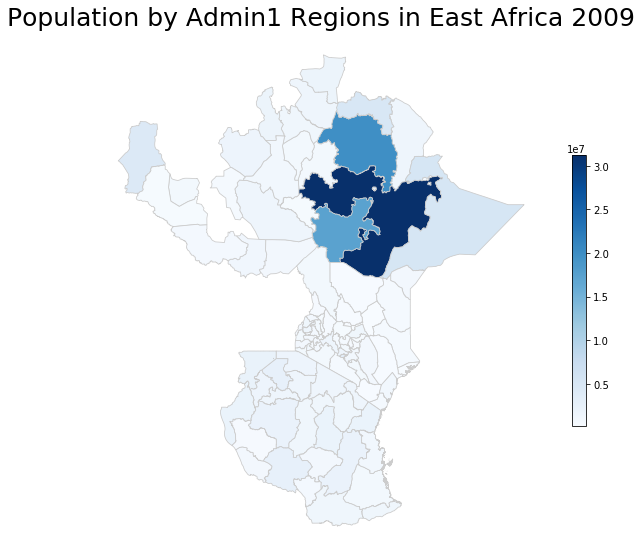

In [70]:
pop2009 = pop_final[(pop_final.year==2009) & (pop_final.month==7)].dropna()

# Set plot size
fig, ax = plt.subplots(1, figsize=(10, 10))

# clear plot borders
ax.axis('off')

# customize plot title
ax.set_title("Population by Admin1 Regions in East Africa 2009", 
             fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot choropleth
pop2009.plot(column='pop', cmap='Blues', linewidth=0.8, edgecolor='0.8', ax=ax)

# Create colorbar as a legend, set the mni and max 
sm = plt.cm.ScalarMappable(cmap='Blues',
                          norm=plt.Normalize(
                              vmin=pop2009['pop'].min(), 
                              vmax=pop2009['pop'].max()))
# add the colorbar to the figure, and shrink it
cbar = fig.colorbar(sm, shrink=0.5)

## 5 Write to disc
Downcast population gdf to df without geometry and write to a csv.

In [71]:
pop_out = pop_final.drop(columns='geometry')

In [73]:
pop_out.to_csv('population.csv')